In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task5 - Thresholding

- Simple Thresholding
- Adaptive Thresholding
- Otsu and Riddler-Calvard Thresholding
- Watershed

## SIMPLE THRESHOLDING

Applying simple thresholding methods requires **human intervention**
- Specify a threshold value **T**
- All pixel intensities **below** T are set to **0**
- All pixel intensities **greater** than T are set to **255**

**Inverse Binarization**

- Setting all pixels **below** T to **255**
- Setting all pixel intensities **greater** than T to **0**

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Threshold the image
- Display the image

#### Import the necessary libraries

In [2]:
import cv2
import numpy as np

#### Load the image

In [3]:
image = cv2.imread("/content/drive/MyDrive/GBC/image7.jpeg")

#### Convert the image into grayscale

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [5]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.threshold( )**
    - image
    - threshold value **T** (manual setting)
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Thresholding method
        - **THRESH_BINARY**
            - Pixel values greater than T are set to maximum value M
    - Returns
        - T (manually set)
        - thresholded image

In [34]:
(T, thresh) = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)

#### Display the thresholded image

In [35]:
from google.colab.patches import cv2_imshow

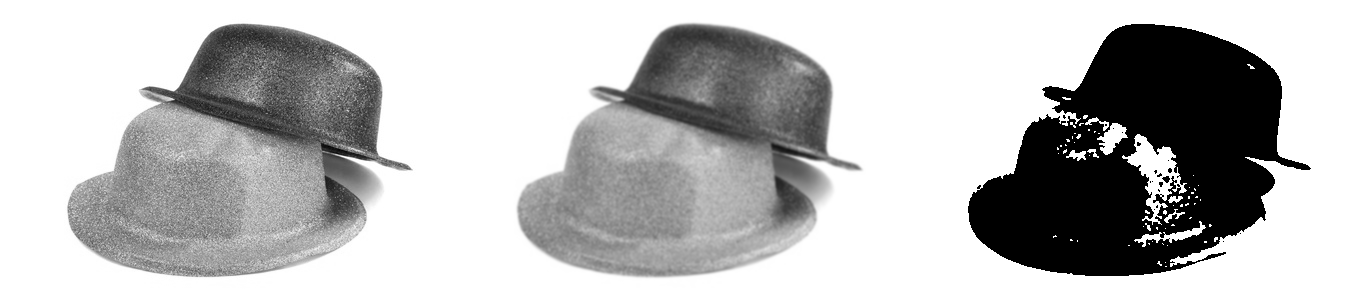

-1

In [36]:
cv2_imshow(np.hstack([gray, blurred, thresh])) 
cv2.waitKey(0)

In [37]:
(T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_TOZERO)

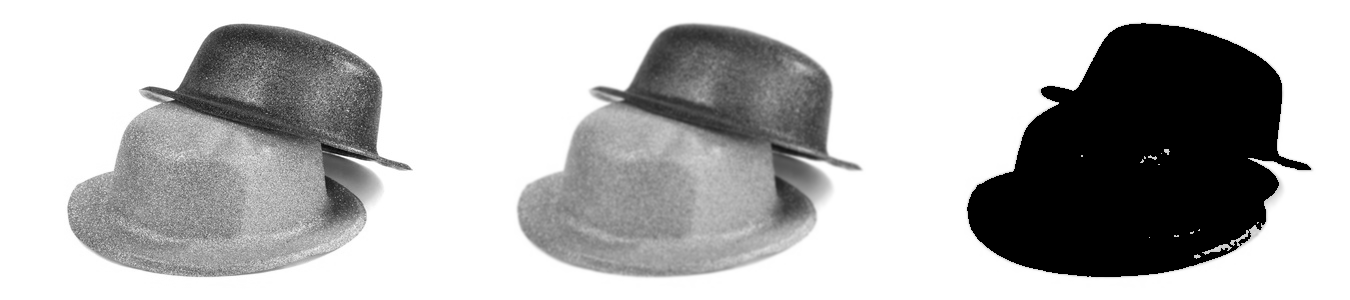

-1

In [38]:
cv2_imshow(np.hstack([gray, blurred, thresh])) 
cv2.waitKey(0)

In [39]:
(T, thresh) = cv2.threshold(blurred, 220, 255, cv2.THRESH_BINARY)

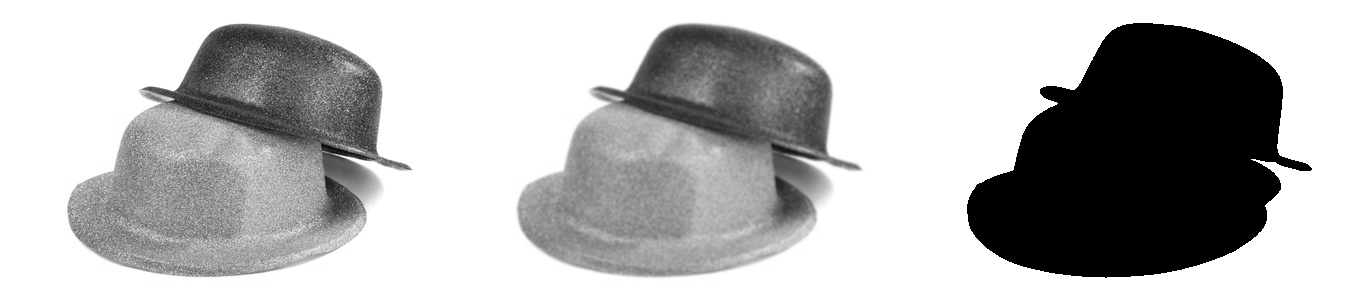

-1

In [40]:
cv2_imshow(np.hstack([gray, blurred, thresh])) 
cv2.waitKey(0)

### Extract the background

In [10]:
background = cv2.bitwise_and(image, image, mask = thresh)

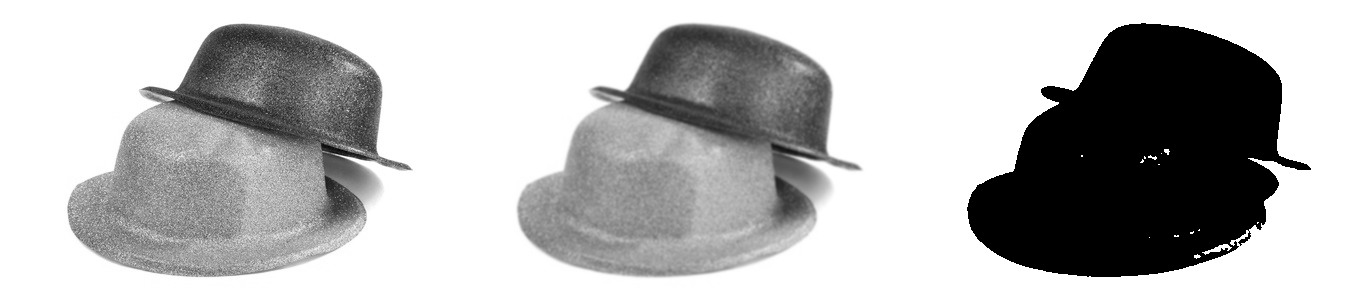

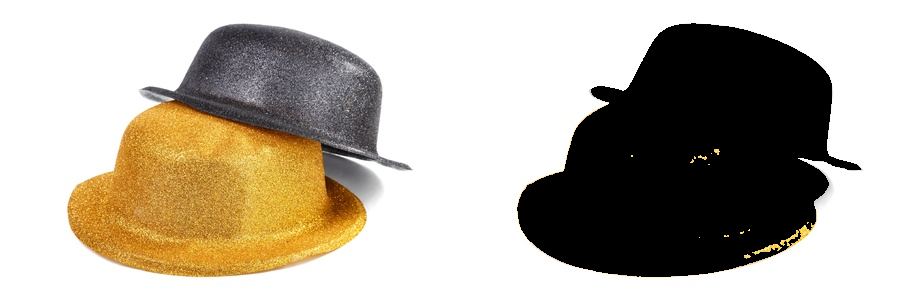

-1

In [11]:
cv2_imshow(np.hstack([gray, blurred, thresh])) # Thresholding of Images
cv2_imshow(np.hstack([image, background])) # Foreground extraction
cv2.waitKey(0)

## ADAPTIVE THRESHOLDING

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Adaptive Threshold the image
- Display the image

#### Import the libraries

In [12]:
import cv2
import numpy as np

#### Load the image

In [13]:
image = cv2.imread("/content/drive/MyDrive/GBC/image7.jpeg")

#### Convert the image into grayscale

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [15]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.adaptiveThreshold( )**
    - image
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Method to compute the thresholding
        - **ADAPTIVE_THRESH_MEAN_C**
            - Compute the mean of the neighborhood of pixels and treat it as T
        - **ADAPTIVE_THRESH_GAUSSIAN_C**
            - Compute the Weighted mean of the neighborhood of pixels and treat it as T
    - Thresholding Method
        - **THRESH_BINARY_INV**
            - If any pixel greater than T in the neighborhood should be set to 255
            - If any pixel less than T, set to 0
    - Neighborhood size
        - Smaller square region for consideration to compute threshold
    - C
        - Integer that is subtracted from the mean allowing us to fine-tune our thresholding
    - Returns
        - T (manually set)
        - thresholded image

In [43]:
thresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 
                               19, 
                               4
)

#### Display the Thresholded image

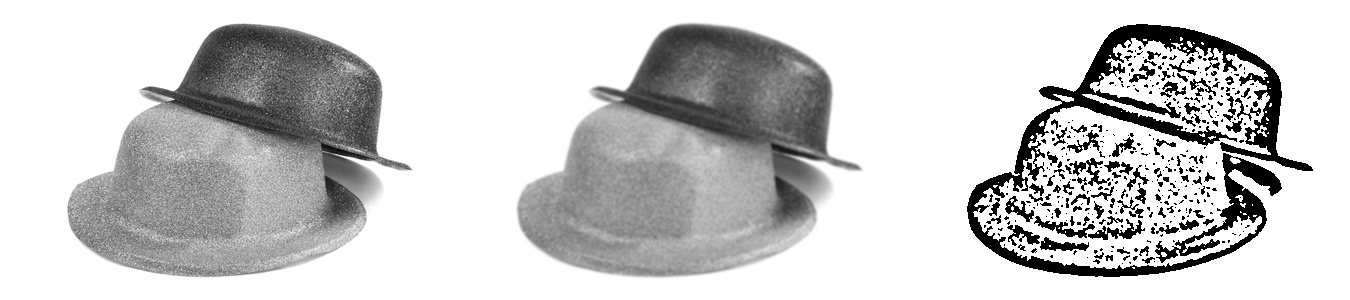

-1

In [44]:
cv2_imshow(np.hstack([gray, blurred, thresh])) # Adaptive Thresholding of Image
cv2.waitKey(0)

### Try Gaussian Thresholding

In [45]:
gaussianthresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 
                               15, 
                               3
)

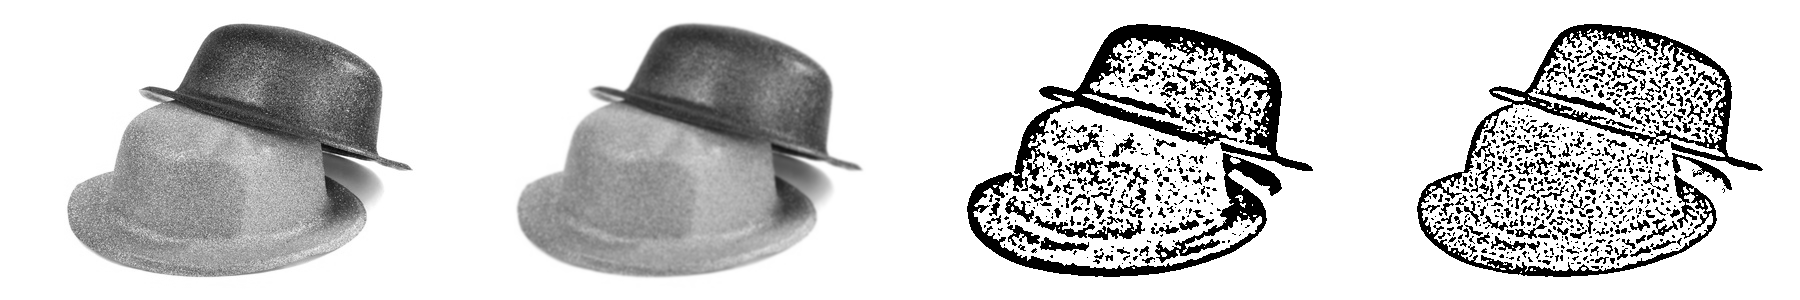

-1

In [46]:
cv2_imshow(np.hstack([gray, blurred, thresh, gaussianthresh])) # Adaptive Thresholding of Images
cv2.waitKey(0) 

### Extract Background

In [47]:
backgroundgaussian = cv2.bitwise_and(image, image, mask = gaussianthresh)

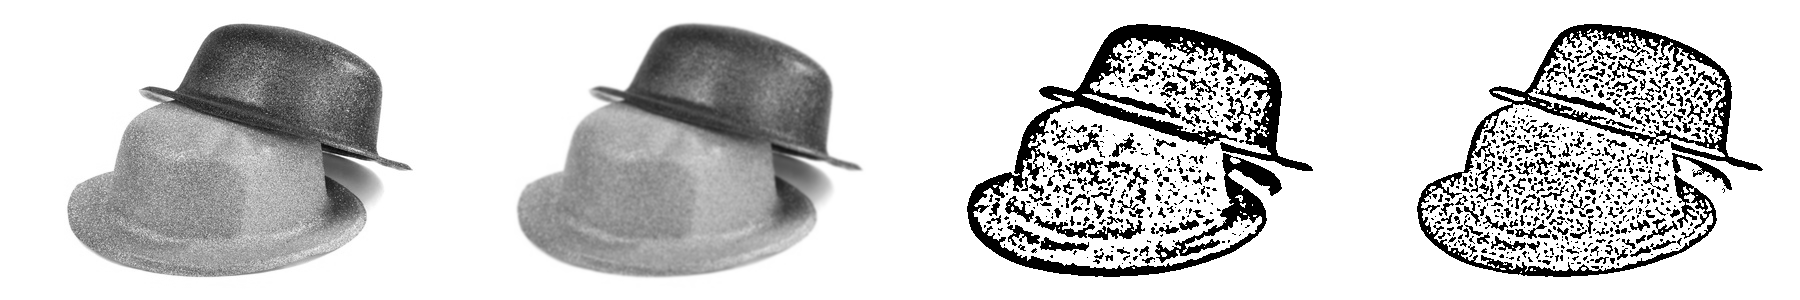

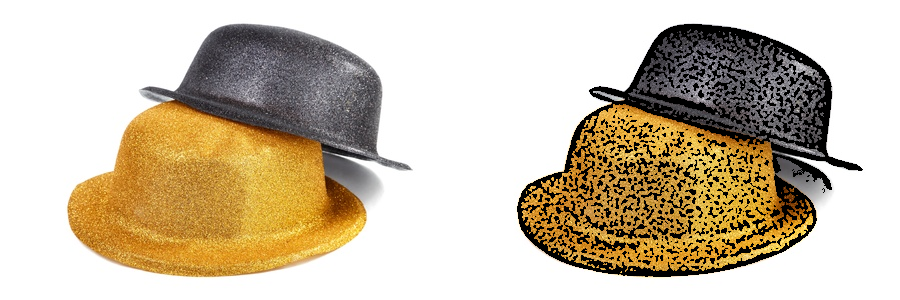

-1

In [48]:
cv2_imshow(np.hstack([gray, blurred, thresh, gaussianthresh])) # Gaussian Adaptive Thresholding of Images
cv2_imshow(np.hstack([image, backgroundgaussian])) # Foreground extraction using Gaussian
cv2.waitKey(0)